In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [2]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()



In [3]:
# Split the dataset into features and target
X = iris_dataset['data']
y = iris_dataset['target']



In [4]:
# --- Preprocessing: Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("First 5 rows of scaled data:\n", X_scaled[:5])



First 5 rows of scaled data:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [5]:
# --- Dimensionality Reduction using PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio by PCA:", pca.explained_variance_ratio_)



Explained variance ratio by PCA: [0.72962445 0.22850762]


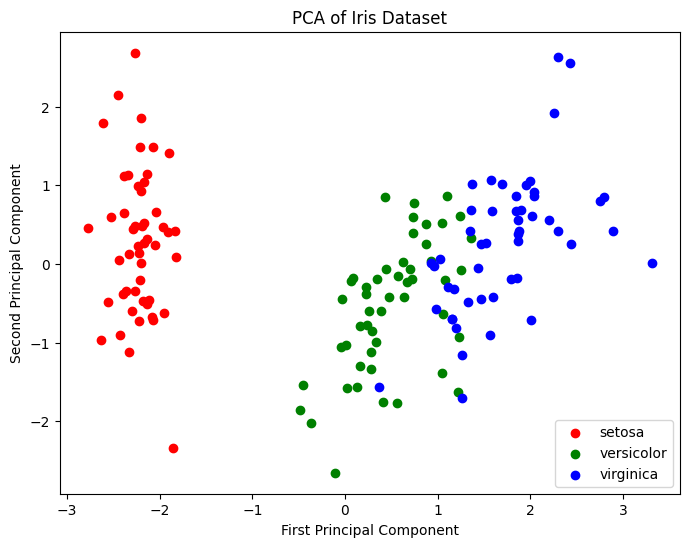

In [6]:
# Visualize the data after PCA
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris_dataset['target_names']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()



In [7]:
# --- Clustering using k-Means ---
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_



In [8]:
# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score for k-Means clustering: {:.2f}".format(silhouette_avg))



Silhouette Score for k-Means clustering: 0.51


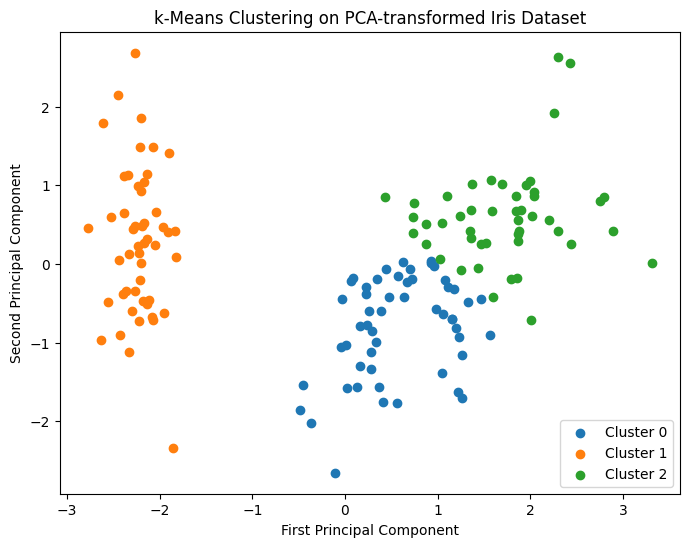

In [9]:
# Visualize k-Means Clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
plt.title('k-Means Clustering on PCA-transformed Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()